In [ ]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Veri setinin yolu
data_path = "C:/Users/abrbl/VeriSeti/_veri/BirlesikGifler1"

# Sınıf etiketleri
classes = ["Evet", "Gel", "Gorusuruz", "Merhaba", "Nasilsin"]

# Görüntü boyutu ve diğer parametreler
num_classes = len(classes)
batch_size = 32
epochs = 50

# Görüntüler ve etiketler için boş listeler
images = []
labels = []

# Veri setini yükleme ve işleme
for i, cls in enumerate(classes):
    cls_path = os.path.join(data_path, cls)
    if os.path.isdir(cls_path):
        for subdir, dirs, files in os.walk(cls_path):
            for file in files:
                if file.endswith(".png" or ".jpg"):
                    image_path = os.path.join(subdir, file)
                    image = Image.open(image_path)
                    image = np.array(image)
                    images.append(image)
                    labels.append(i)

# Verileri Numpy dizilerine dönüştürme
images = np.array(images)
labels = np.array(labels)

# Veri setini eğitim ve doğrulama olarak bölme
train_images, val_images, train_labels, val_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

#model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(720, 720, 4)),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),   
    
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),   
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax') 
])


In [ ]:
# Modeli derleme
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Modeli eğitme
history = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_data=(val_images, val_labels))

Epoch 1/50


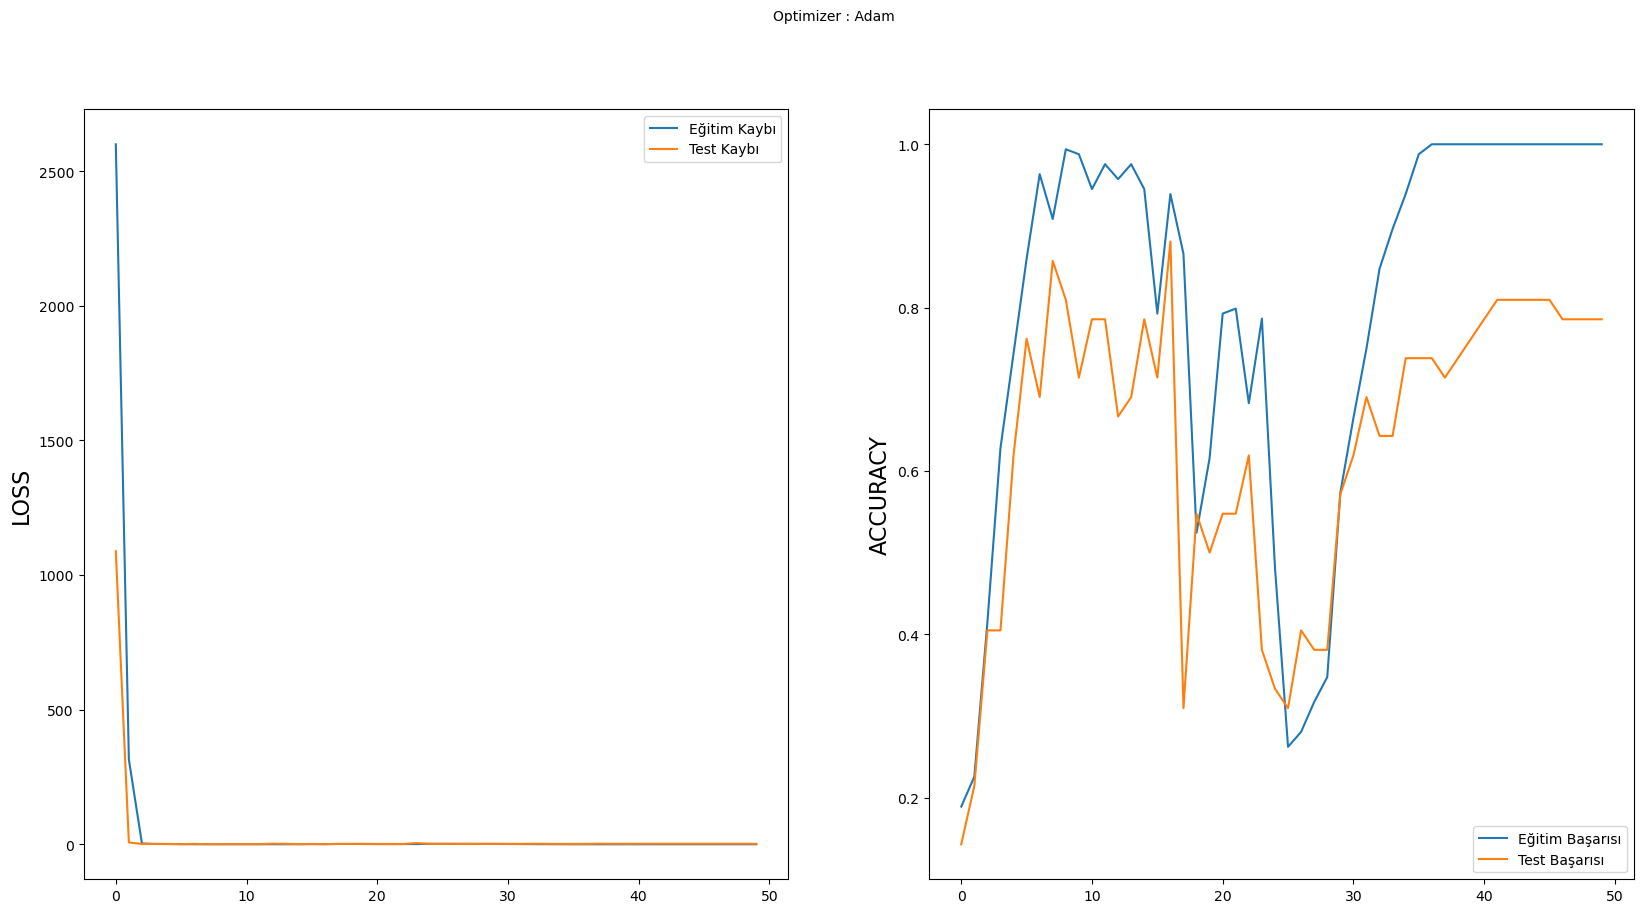

In [4]:
import matplotlib.pyplot as plt

#eğitim grafiği çizdirme

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('LOSS', fontsize=16)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Test Kaybı')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('ACCURACY', fontsize=16)
plt.plot(history.history['accuracy'], label='Eğitim Başarısı')
plt.plot(history.history['val_accuracy'], label='Test Başarısı')
plt.legend(loc='lower right')
plt.show()

In [5]:
#test değerini ve kayıp değerleri verme
test_images = images[int(0.2 * len(images)):] 

test_labels = labels[int(0.2 * len(images)):]  

test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


6/6 - 3s - loss: 0.4588 - accuracy: 0.9455 - 3s/epoch - 417ms/step
Test Loss: 0.4587709903717041
Test Accuracy: 0.9454545378684998


In [6]:
# modeli kaydetme
from keras.models import load_model

model_json = model.to_json()
with open("resim_deneme.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights('resim_deneme.h5') 

In [7]:

#Eğitilmiş modeli yükleme
import keras
from keras.models import model_from_json

WORDS = ["Evet","Gel","Gorusuruz","Merhaba","Nasilsin"]
json_file = open('./resim_deneme.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("./resim_deneme.h5")
print("Dosya Yüklendi")

Dosya Yüklendi


2/2 [==============================] - 1s 174ms/step


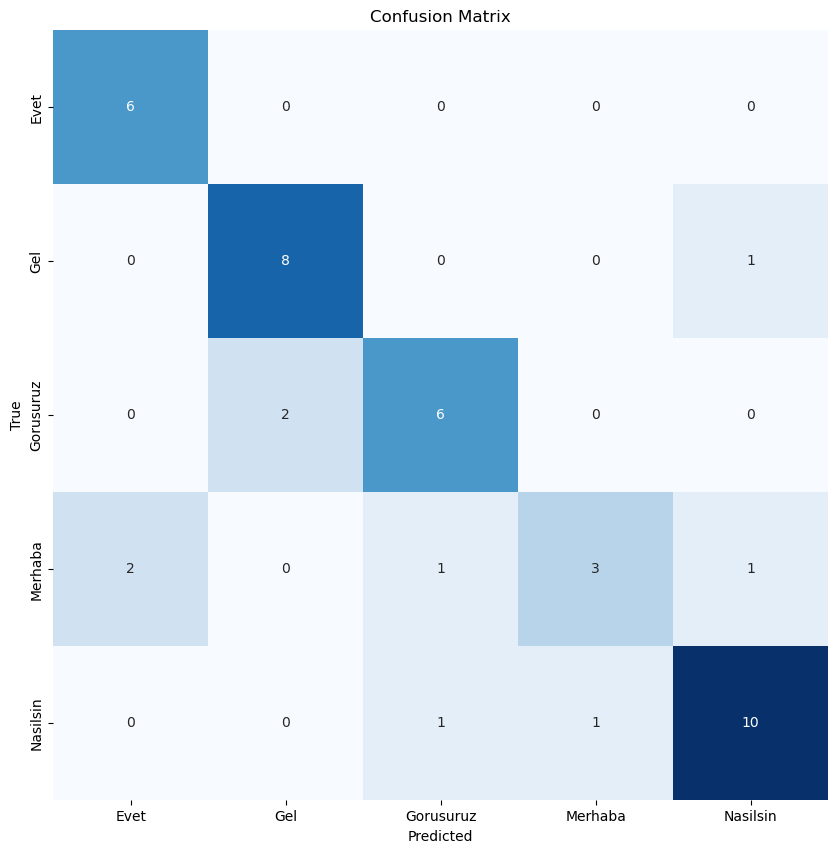

Evet: 6 tahmin
Gel: 9 tahmin
Gorusuruz: 8 tahmin
Merhaba: 7 tahmin
Nasilsin: 12 tahmin


In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Tahminlerin ve gerçek etiketlerin elde edilmesi
predictions = loaded_model.predict(val_images)
y_pred = np.argmax(predictions, axis=1)
y_true = val_labels

# Confusion matrix'in hesaplanması
cm = confusion_matrix(y_true, y_pred)

# Sınıf adlarını etiketleyin
class_names = ["Evet","Gel","Gorusuruz","Merhaba","Nasilsin"]

# Confusion matrix'in görselleştirilmesi
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=class_names, yticklabels=class_names)

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Sınıf bazında tahminlerin sayısını hesapla
class_counts = {}
for i, class_name in enumerate(class_names):
    class_counts[class_name] = np.sum(y_true == i)

# Tahminlerin sayısını ekrana yazdır
for class_name in class_counts:
    print(f"{class_name}: {class_counts[class_name]} tahmin")


In [4]:
from PIL import Image
import numpy as np

image_path = 'C:/Users/abrbl/VeriSeti/_veri/Gel/video1528346663.png'

# Görüntüyü yükleyin ve boyutunu modele uygun şekilde değiştirin
img = Image.open(image_path)
img = img.resize((720,720))

# Görüntüyü Numpy dizisine dönüştürün ve modele uygun şekilde hazırlayın
x = np.array(img)
x = np.expand_dims(x, axis=0)


# Modeli kullanarak tahmin yapın
predictions = loaded_model.predict(x)

# Tahmini sınıf adına çevirin
predicted_class_index = np.argmax(predictions[0])
predicted_word = WORDS[predicted_class_index]

print("Tahmin:", predicted_word)

1/1 [==============================] - 0s 53ms/step
Tahmin: Gorusuruz


In [2]:
from keras.models import model_from_json
# Eğitilmiş modeli yükleme
WORDS = ["Evet", "Gel", "Gorusuruz", "Merhaba", "Nasilsin"]
json_file = open('./resim_deneme.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("./resim_deneme.h5")
print("Model Yüklendi")

Model Yüklendi


In [3]:
import tkinter as tk
from tkinter import filedialog
from PIL import ImageTk, Image
import os
import numpy as np
import extractFrame 
import FrameDelete 
import resize
import GifKirp 
import gif2
import Uygulama 


root = tk.Tk()
root.title("Dudak Okuma Uygulaması")

video_path = ""

def select_video():
    global video_path
    video_path = filedialog.askopenfilename(filetypes=[("Video Dosyaları", "*.mp4")])
    print("Seçilen Video Dosyası:", video_path)
    video_name_label.config(text="Seçilen Video: " + os.path.basename(video_path))

def process_and_predict():
    global video_path
    if video_path == "":
        print("Video dosyası seçilmedi!")
        return

    save_path = os.path.splitext(video_path)[0]
    video_directory = os.path.dirname(video_path)
    save_gif = save_path + ".gif"

    extractFrame.e_Video_Frames(video_path, video_directory)
    resize.resized_image(video_directory)
    FrameDelete.deleteEmpty(video_directory)
    gif2.videoGif(video_directory, save_gif)

    video_files = sorted([f for f in os.listdir(video_directory) if f.endswith(".jpg")]) 
    for video_file in video_files:
        FrameDelete.HepsiniSil(video_directory)
    GifKirp.gif_kirp1(save_gif, video_directory)    
    combined_image_path = Uygulama.combine_gif_frames(save_gif,video_directory)
    print("Video İşlendi")
    tahmin_sonucu = predict_image(combined_image_path)  # Tahmin fonksiyonunu ekleyip çağırın
    finish(video_directory)
    if tahmin_sonucu is not None:
        sonuc_label.config(text="Tahmin Sonucu: " + tahmin_sonucu)
    else:
        sonuc_label.config(text="Tahmin Sonucu: Belirsiz")
        select_video()
    
def predict_image(image_path):
    img = Image.open(image_path).convert("RGBA")
    img = img.resize((720, 720))

    # Görüntüyü Numpy dizisine dönüştürün ve modele uygun şekilde hazırlayın
    x = np.array(img)
    x = np.expand_dims(x, axis=0)

    # Modeli kullanarak tahmin yapın
    predictions = loaded_model.predict(x)

    # Tahmini sınıf adına çevirin
    predicted_class_index = np.argmax(predictions[0])
    predicted_word = WORDS[predicted_class_index]
    return predicted_word

def finish(folder_path):
    image_extensions = ['.jpg', '.jpeg', '.png','.gif']
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            file_path = os.path.join(root, file)
            file_extension = os.path.splitext(file_path)[1].lower()
            if file_extension in image_extensions:
                os.remove(file_path)
                
frame = tk.Frame(root, padx=100, pady=50)
frame.pack()

title_label = tk.Label(frame, text="Dudak Okuma Uygulaması", font=("Helvetica", 18, "bold"))
title_label.pack(pady=5)

select_button = tk.Button(frame, text="Video Seç", font=("Helvetica", 12), command=select_video)
select_button.configure(bg='blue', fg='white')
select_button.pack(pady=15)

video_name_label = tk.Label(frame, text="Seçilen Video: ", font=("Helvetica", 12))
video_name_label.pack(pady=15)

process_button = tk.Button(frame, text="Tahmin Et", font=("Helvetica", 12), command=process_and_predict)
process_button.configure(bg='blue', fg='white')
process_button.pack(pady=15)

sonuc_label = tk.Label(frame, text="Tahmin Sonucu: ", font=("Helvetica", 12))
sonuc_label.pack(pady=15)

root.mainloop()


Seçilen Video Dosyası: C:/Users/abrbl/VeriSeti/_Test/Nasilsin/video1285741000.mp4
Extracted 97 faces from C:/Users/abrbl/VeriSeti/_Test/Nasilsin/video1285741000.mp4
Resized images!
Boş resimler silindi
C:/Users/abrbl/VeriSeti/_Test/Nasilsin\video1285741000.gif oluşturuldu
video1285741000.gif isimli GIF görüntüsü zoom yapıldı ve kaydedildi: C:/Users/abrbl/VeriSeti/_Test/Nasilsin\video1285741000.gif
Video İşlendi
1/1 [==============================] - 1s 1s/step
